In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('data/data.csv')

In [38]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
data.shape

(1000, 8)

In [40]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [41]:
data.duplicated().sum()

np.int64(0)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [44]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [46]:
numeric_features = [ feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [ feature for feature in data.columns if data[feature].dtype == 'O']

print ('weWe have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


weWe have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [47]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average score'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [49]:
reading_full = data[data['reading score'] == 100]['average score'].count()
writing_full = data[data['writing score'] == 100]['average score'].count()
math_full = data[data['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [50]:
reading_less_20 = data[data['reading score'] <= 20]['average score'].count()
writing_less_20 = data[data['writing score'] <= 20]['average score'].count()
math_less_20 = data[data['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


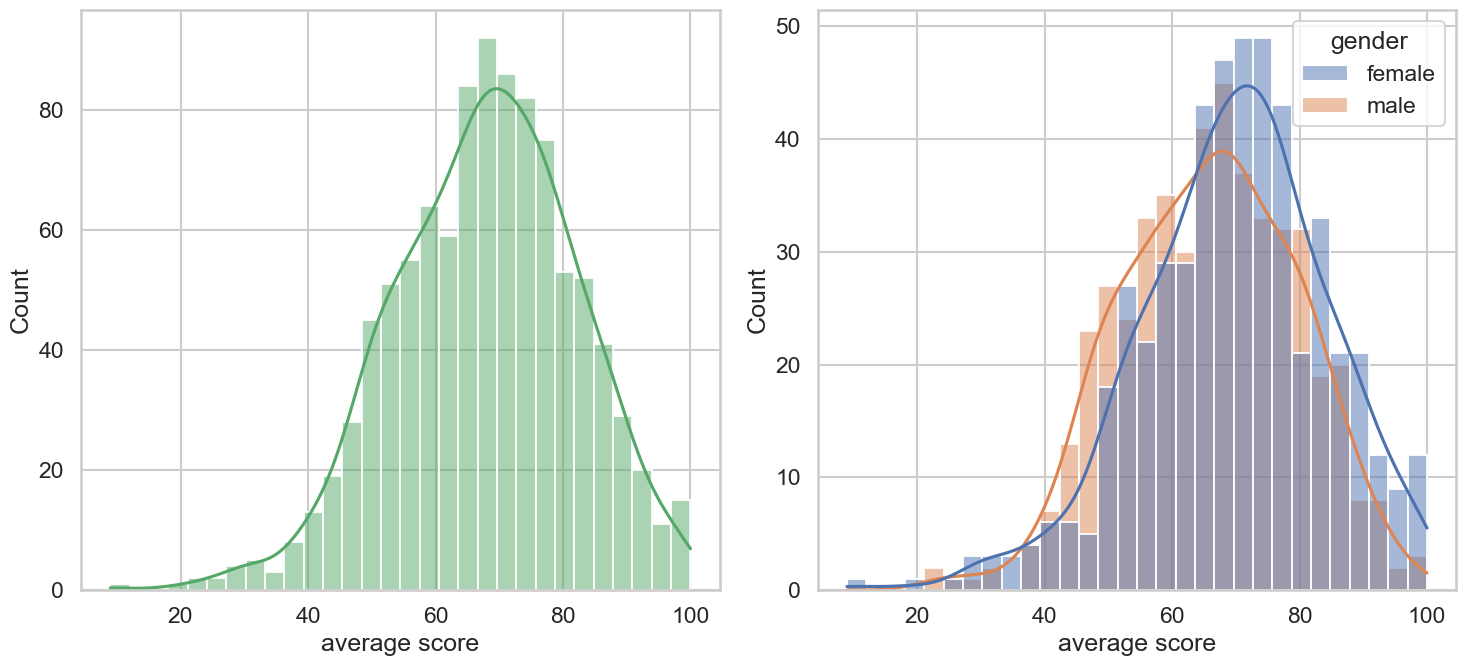

In [51]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))

sns.histplot(data = data, x = 'average score', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=data, x='average score', bins=30, kde=True, hue='gender', ax=axs[1])

plt.tight_layout()

plt.show()

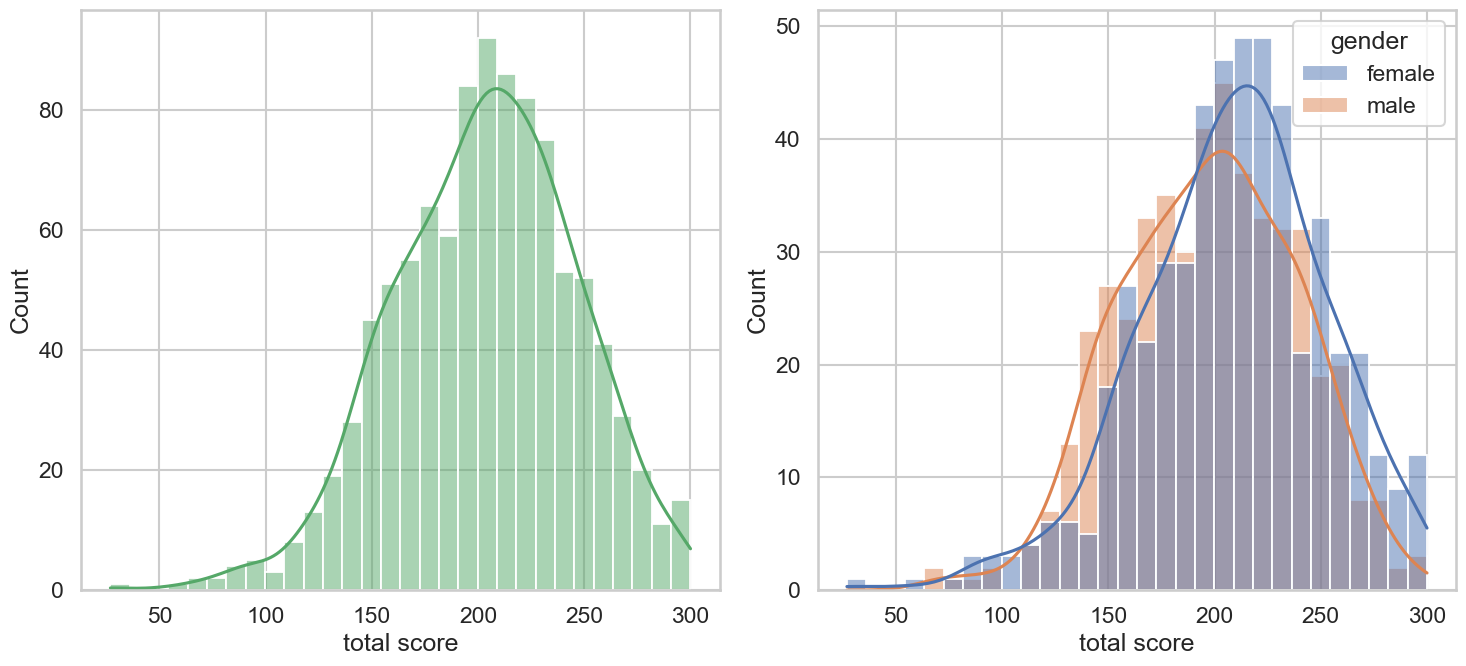

In [52]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))

sns.histplot(data = data, x = 'total score', bins=30, kde=True, color='g', ax=axs[0])

sns.histplot(data=data, x='total score', bins=30, kde=True, hue='gender', ax=axs[1])

plt.tight_layout()

plt.show()

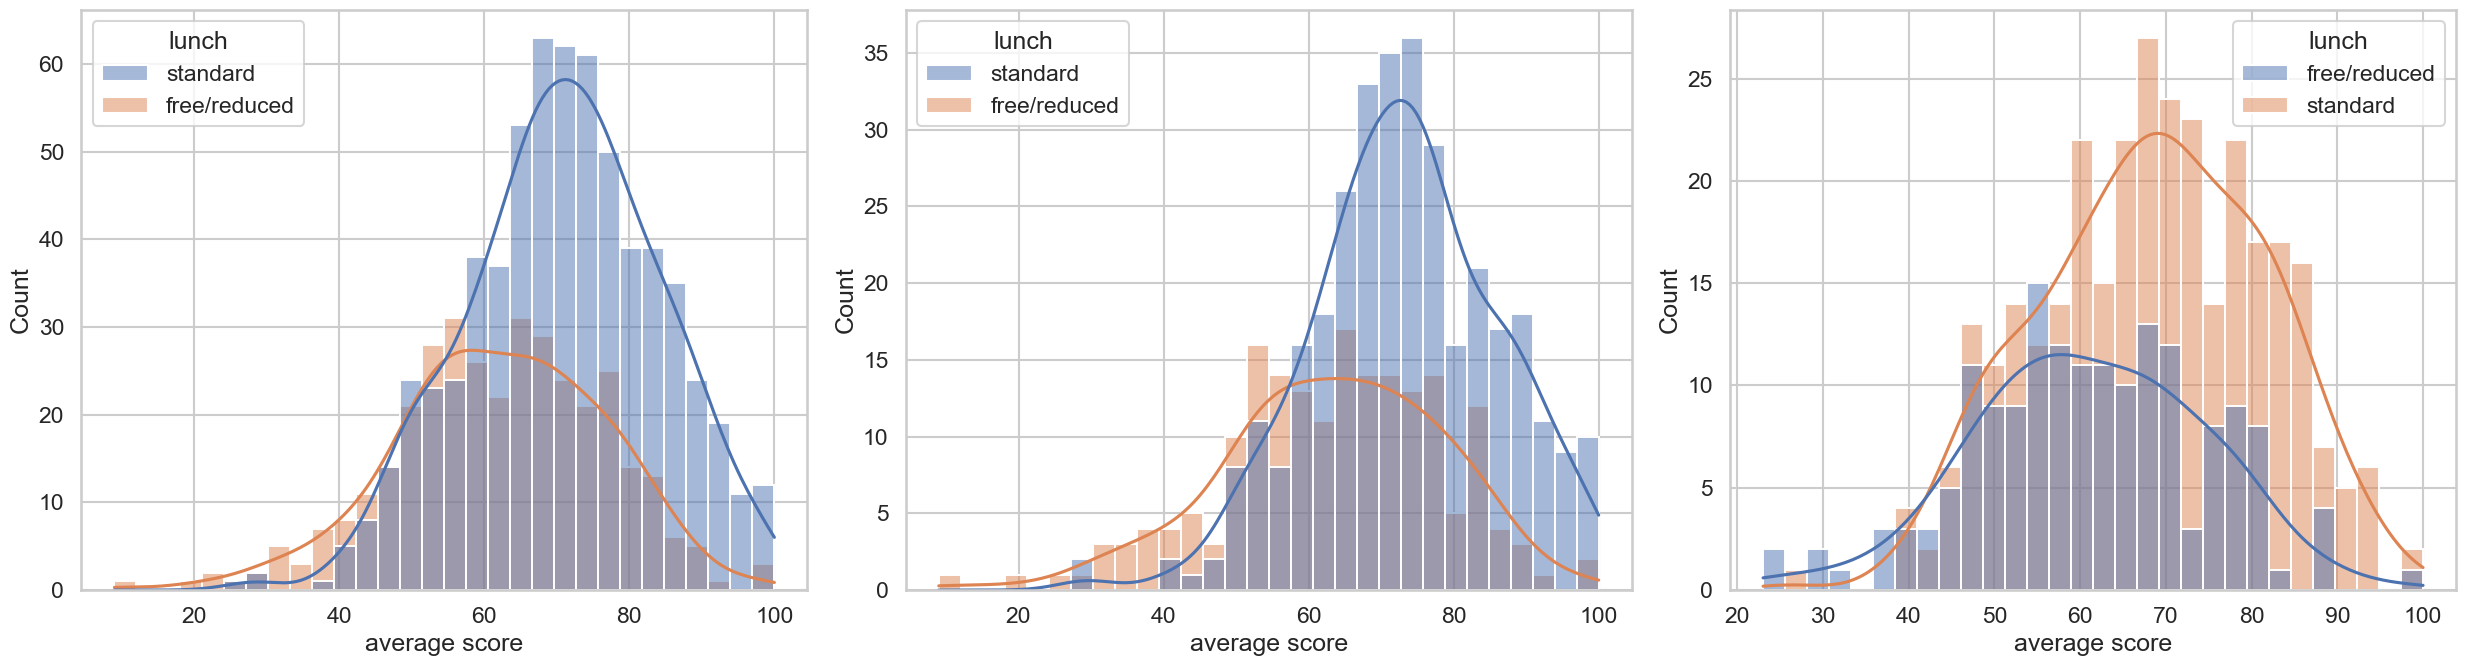

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='lunch', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='lunch', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='lunch', ax=axs[2])

plt.tight_layout()
plt.show()

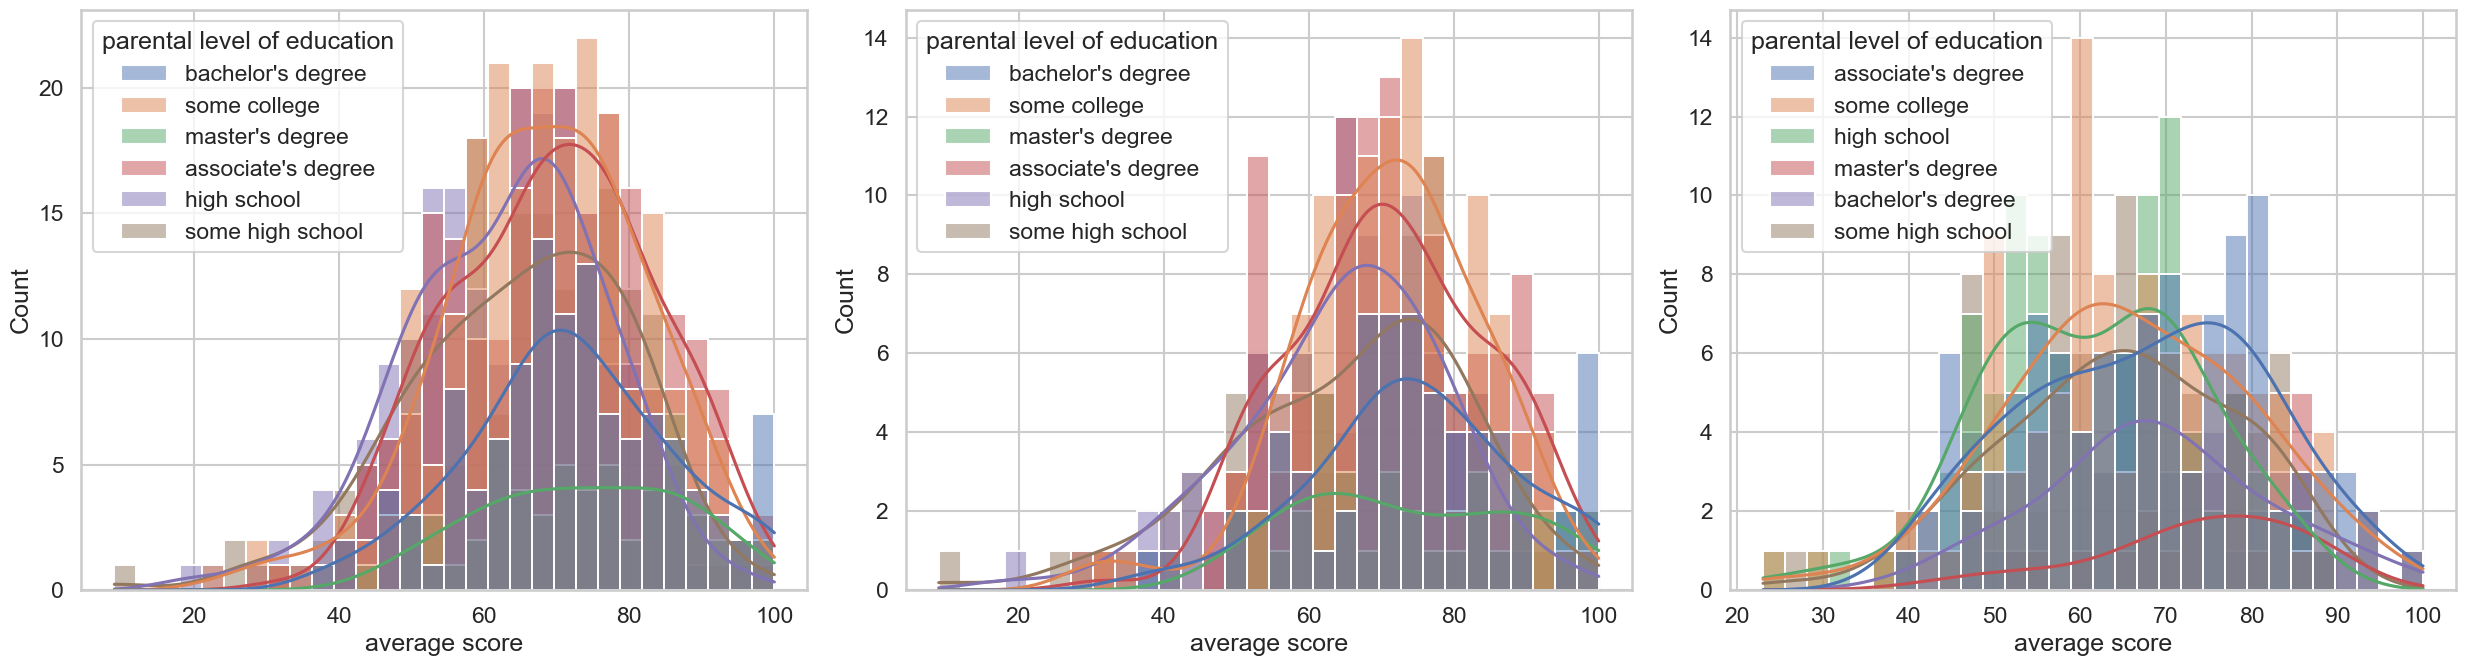

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='parental level of education', ax=axs[2])

plt.tight_layout()
plt.show()

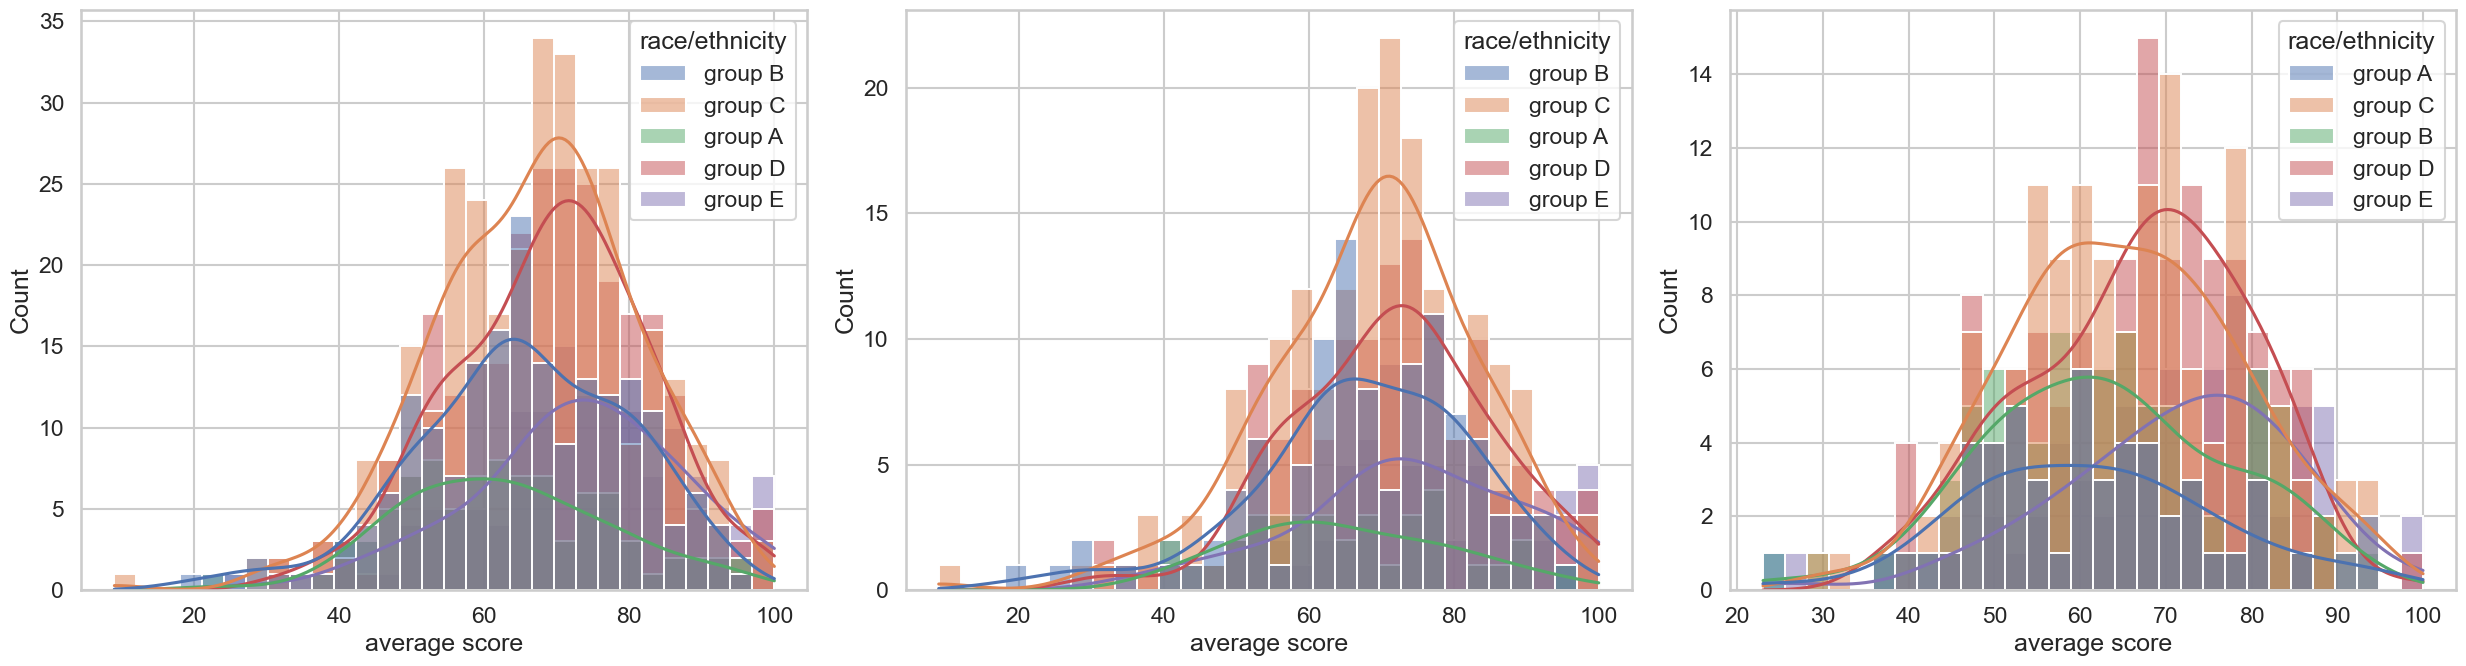

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# 1) All students
sns.histplot(data=data, x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[0])

# 2) Female students only
sns.histplot(data=data[data.gender == 'female'], x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[1])

# 3) Male students only
sns.histplot(data=data[data.gender == 'male'], x='average score', bins=30, kde=True, hue='race/ethnicity', ax=axs[2])

plt.tight_layout()
plt.show()

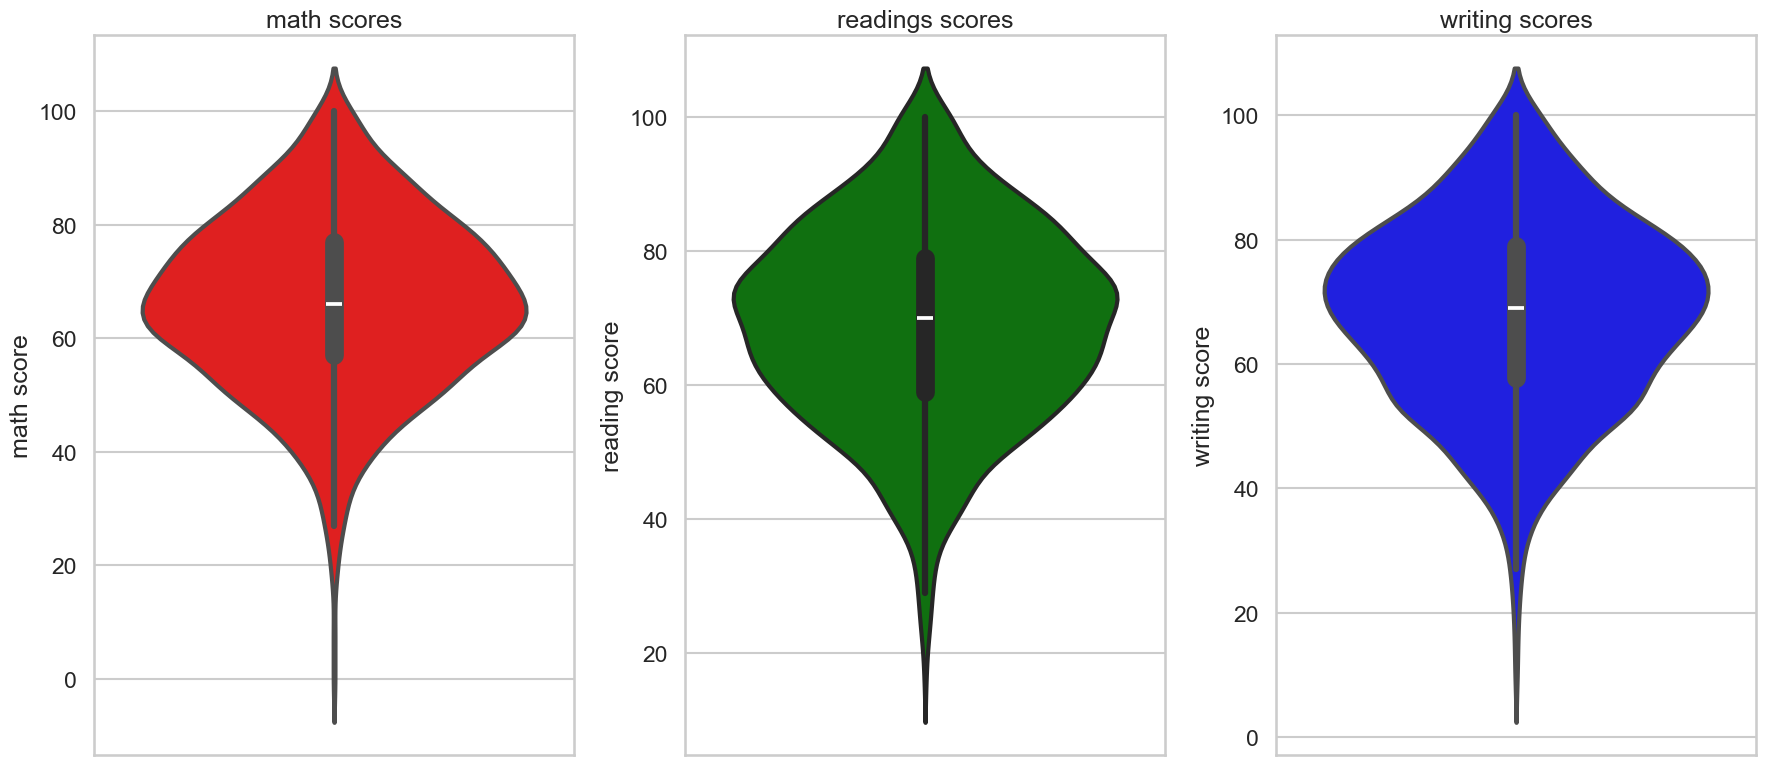

In [56]:
fig, axs = plt.subplots(1,3, figsize = (18,8))

sns.violinplot( y ='math score', data = data, color = 'red', linewidth = 3, ax = axs[0])
axs[0].set_title('math scores')

sns.violinplot( y ='reading score', data = data, color = 'green', linewidth = 3, ax = axs[1])
axs[1].set_title('readings scores')

sns.violinplot( y ='writing score', data = data, color = 'blue', linewidth = 3, ax = axs[2])
axs[2].set_title('writing scores')

plt.tight_layout()
plt.show()



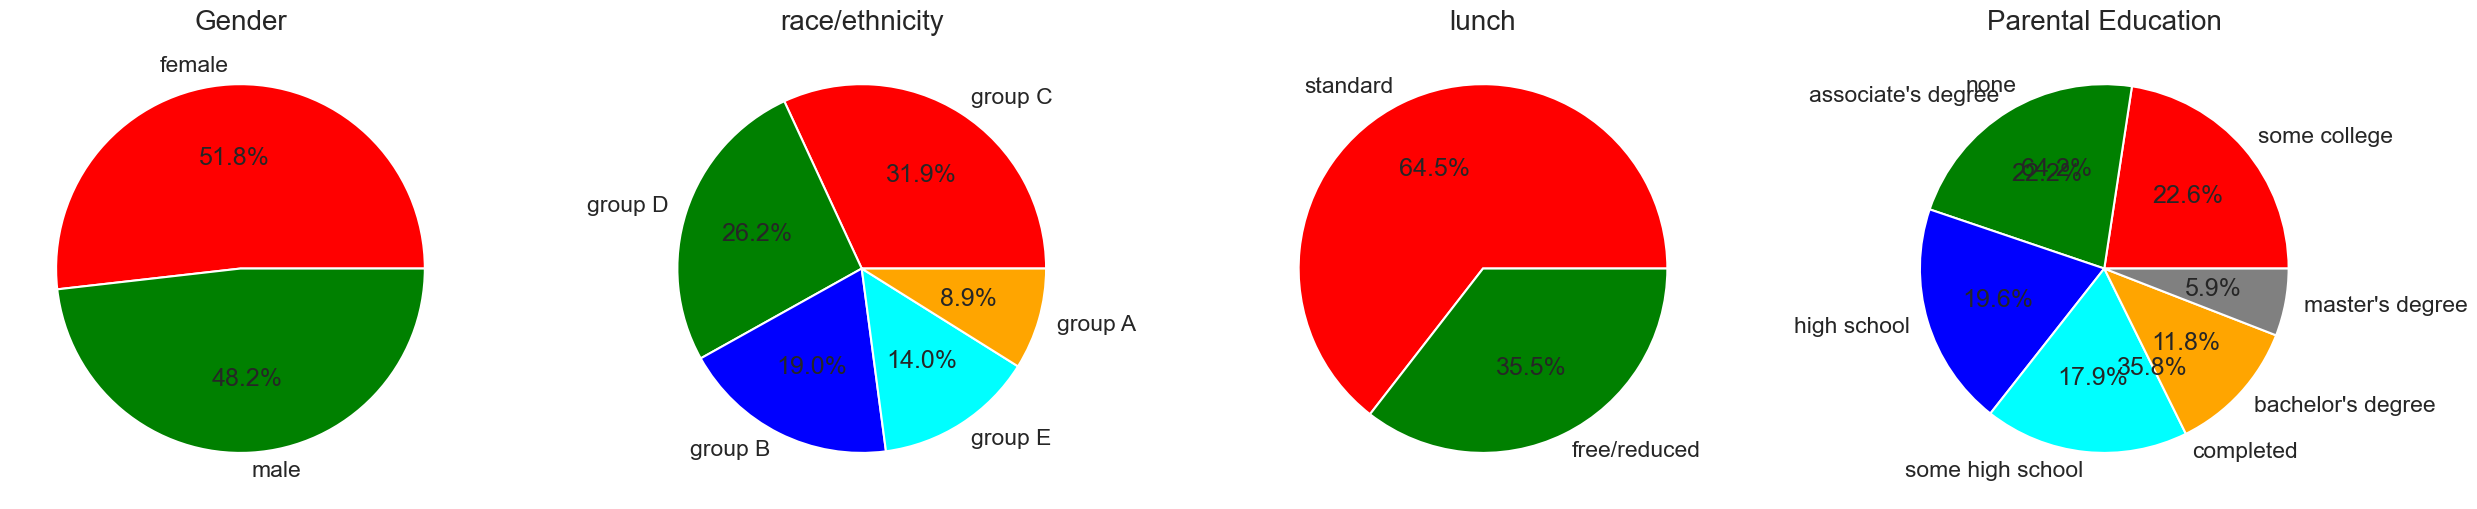

In [57]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = data['gender'].value_counts()
plt.pie(size, labels = size.index, autopct='%1.1f%%', colors = ['red', 'green'])
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = data['race/ethnicity'].value_counts()
plt.pie(size, labels = size.index, autopct='%1.1f%%', colors = ['red','green','blue','cyan','orange'])
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = data['lunch'].value_counts()
plt.pie(size, labels = size.index, autopct='%1.1f%%', colors = ['red','green'])
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = data['test preparation course'].value_counts()
plt.pie(size, labels = size.index, autopct='%1.1f%%', colors = ['red','green'])
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = data['parental level of education'].value_counts()
plt.pie(size, labels = size.index, autopct='%1.1f%%', colors = ['red','green','blue','cyan','orange','grey'])
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.show()



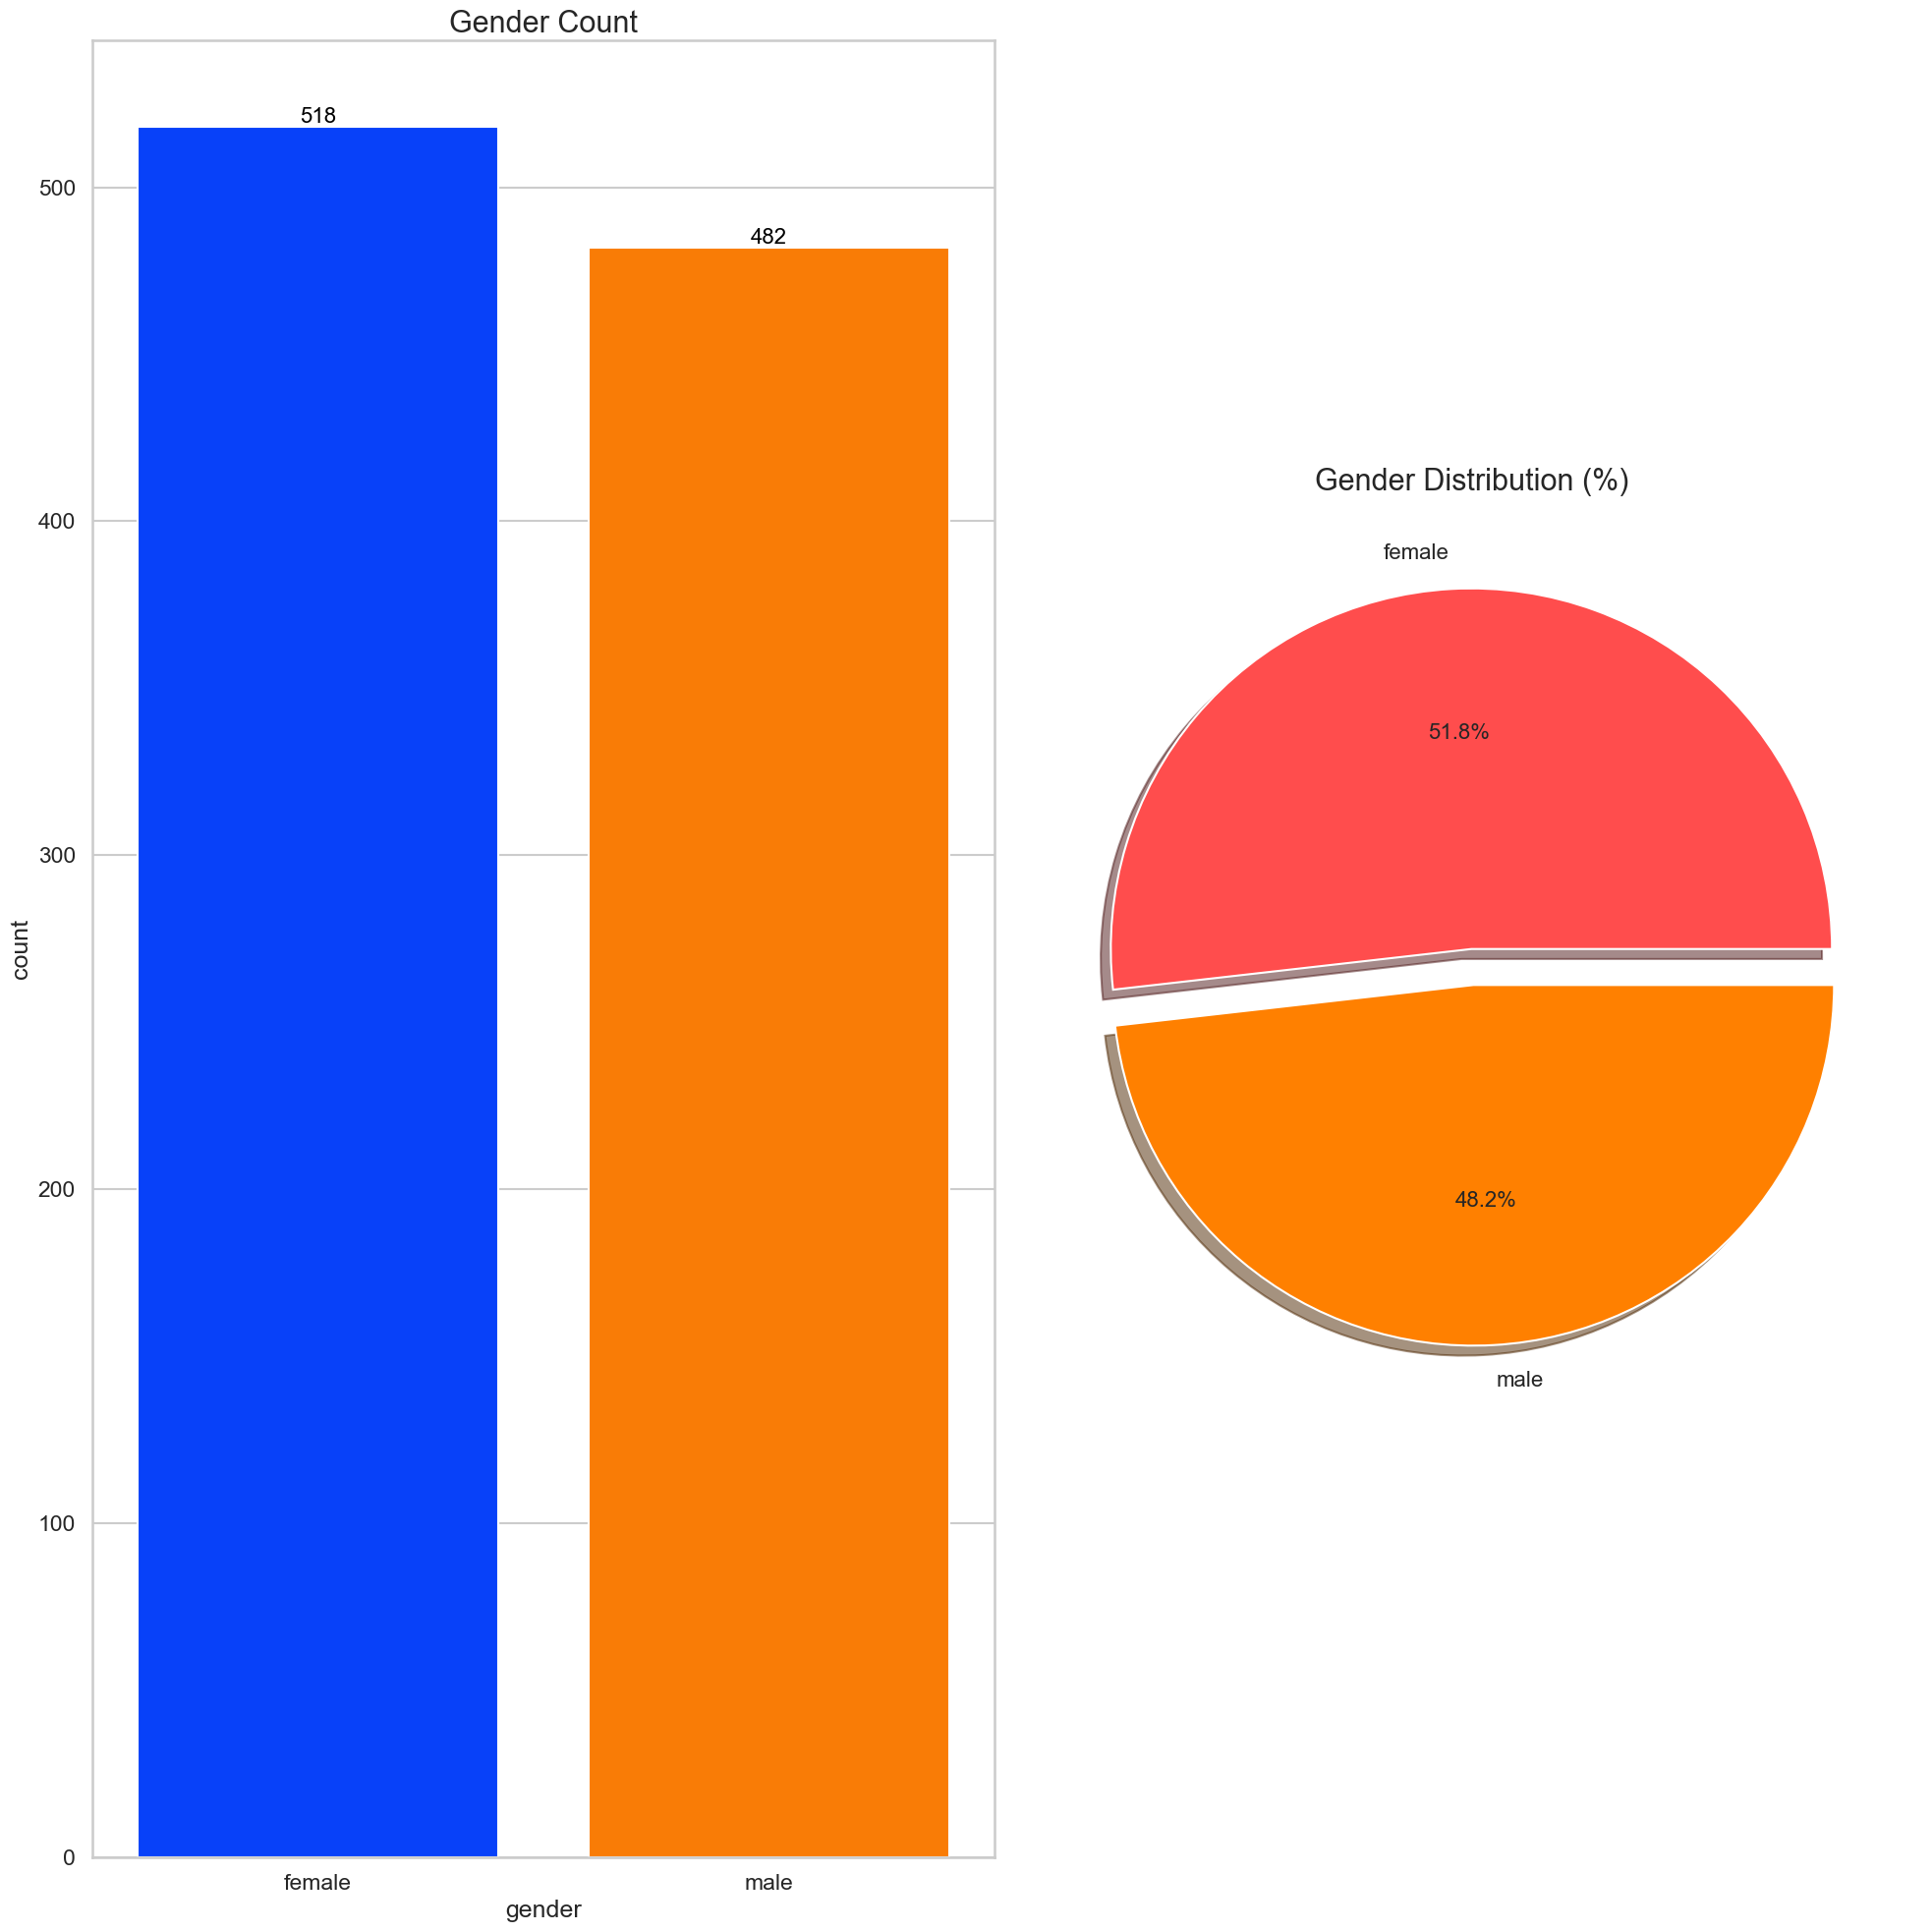

In [58]:
fig, axs = plt.subplots(1, 2, figsize = (20,20))

sns.countplot(x = 'gender', data = data, palette = 'bright', ax=axs[0], saturation=.95)

for container in axs[0].containers:
    axs[0].bar_label(container, color = 'black', size = 16 )

axs[0].set_title("Gender Count", fontsize = 22)

sizes = data['gender'].value_counts()
labels = sizes.index

axs[1].pie(
    sizes,
    labels = labels,
    explode = [0, 0.1],
    autopct = '%1.1f%%',
    shadow = True,
    colors = ['#ff4d4d', '#ff8000'],
    textprops = {'fontsize' : 16}

)

axs[1].set_title("Gender Distribution (%)", fontsize = 22)

plt.tight_layout()
plt.show()

In [59]:
gender_group = data.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


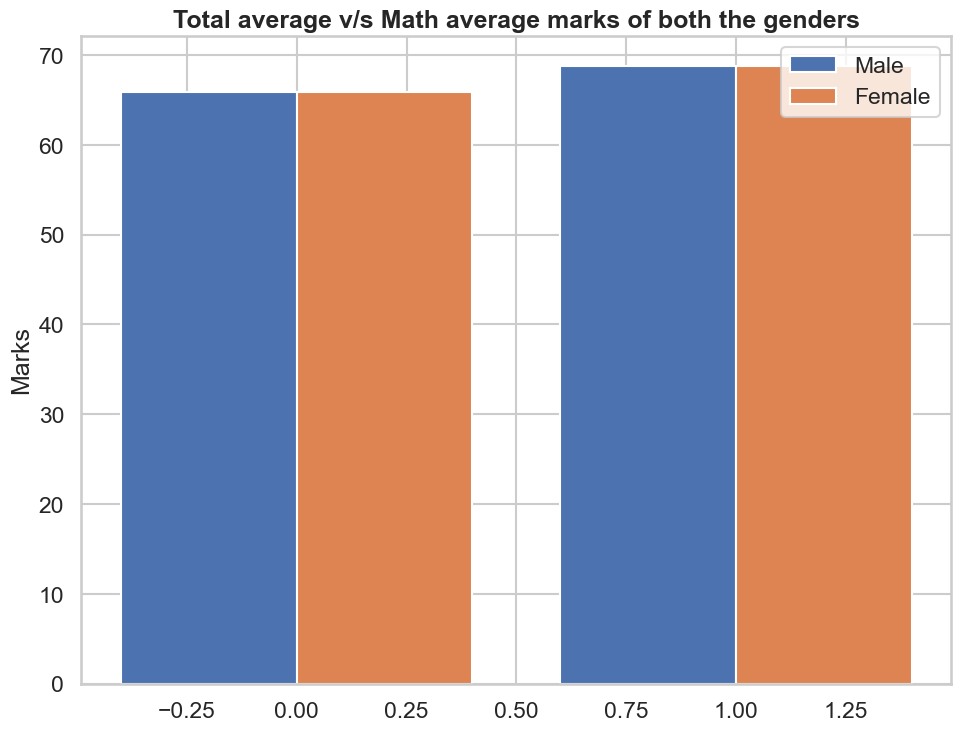

In [60]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, male_scores, 0.4, label = 'Female')

plt.xticks()
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight = 'bold')
plt.legend()
plt.show()

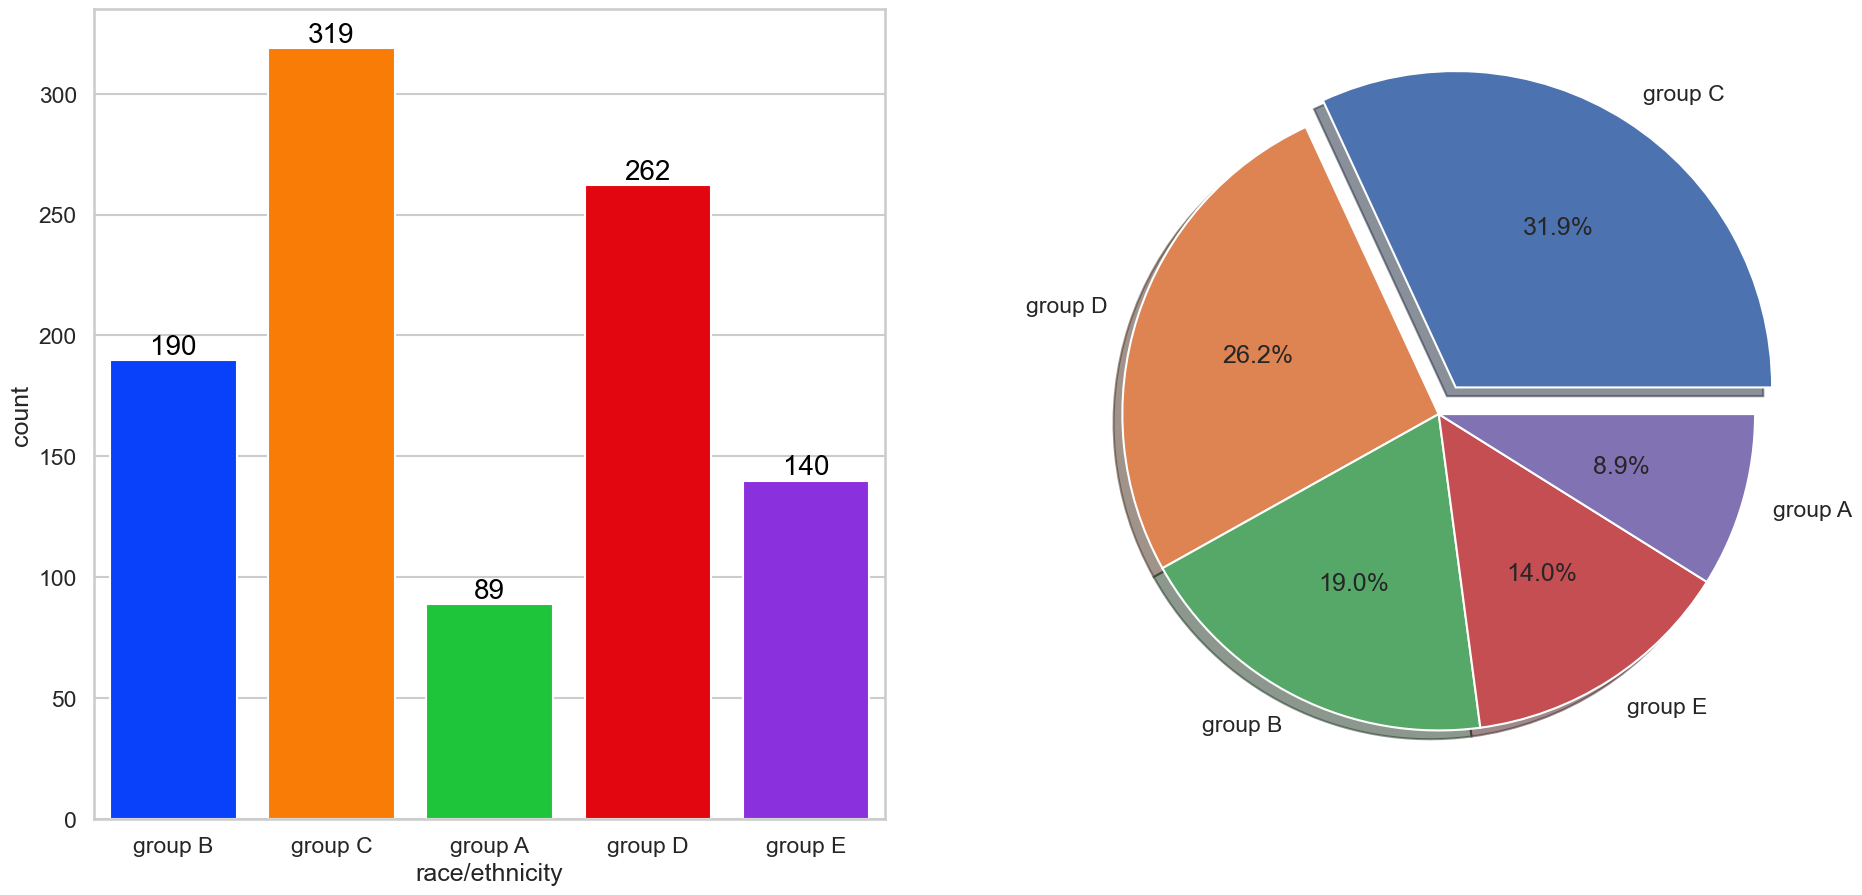

In [61]:
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = data['race/ethnicity'], data = data, palette = 'bright', ax = ax[0], saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

ax[1].pie(x = data['race/ethnicity'].value_counts(), labels=data['race/ethnicity'].value_counts().index, explode = [0.1,0,0,0,0], autopct= '%1.1f%%', shadow = True)
plt.show()

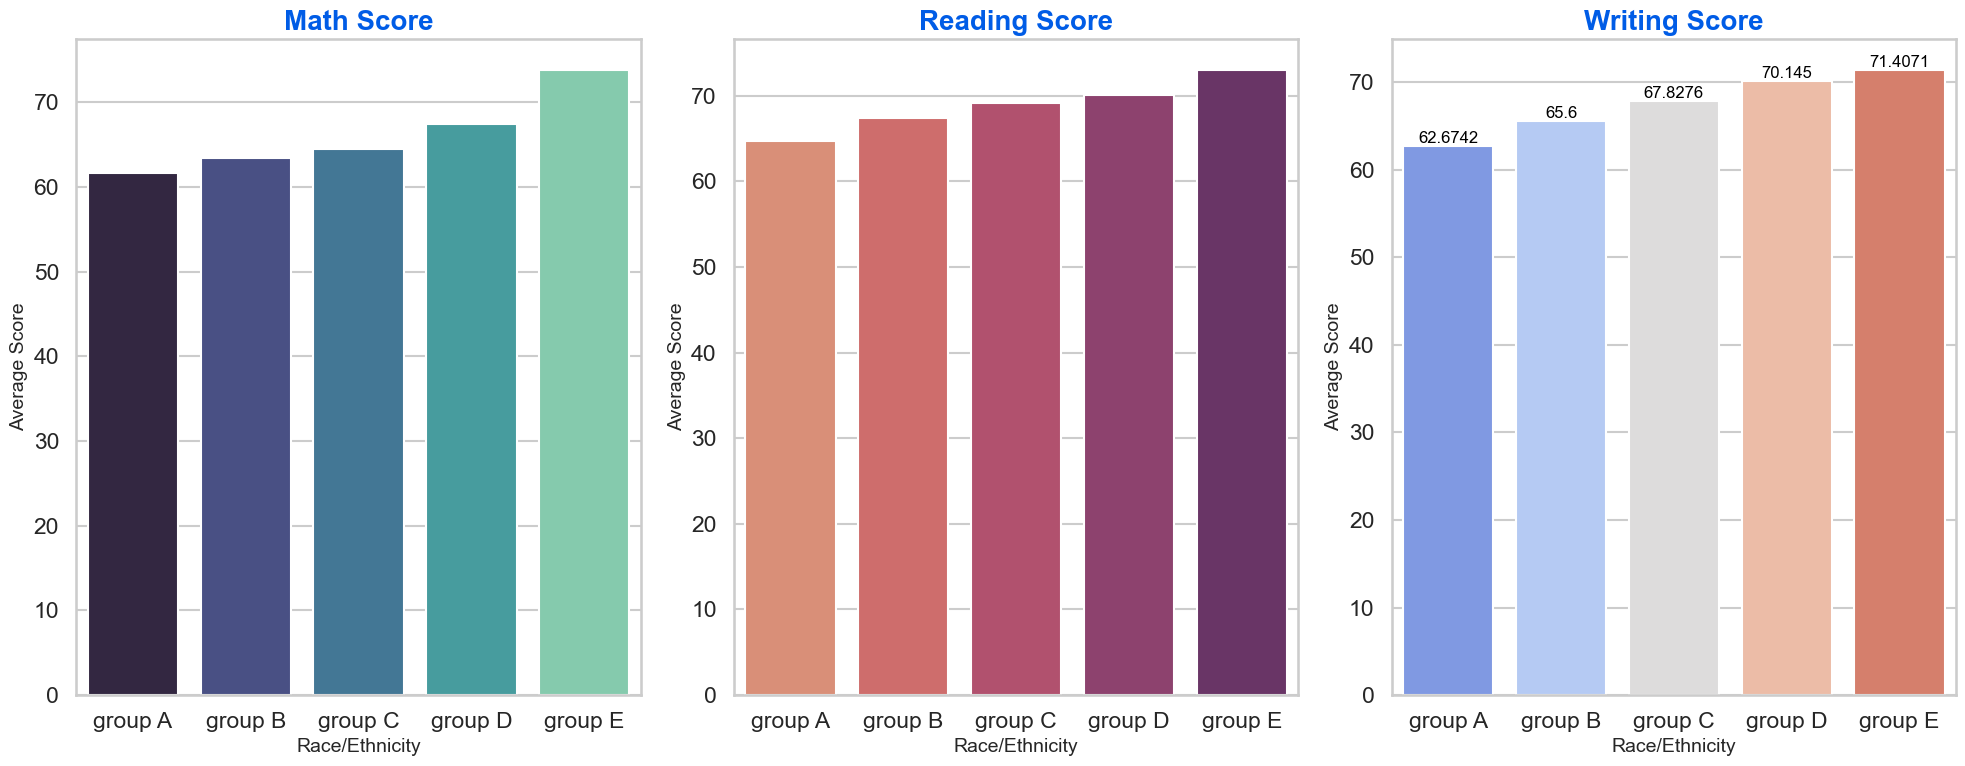

In [62]:
Group_data2 = data.groupby('race/ethnicity')

subjects = [
    ('math score', 'Math Score', 'mako'),
    ('reading score', 'Reading Score', 'flare'),
    ('writing score', 'Writing Score', 'coolwarm'),    
]

f,ax = plt.subplots(1,3, figsize = (20,8))

for i, (col, title, palette) in enumerate(subjects):
    sns.barplot(
        x = Group_data2[col].mean().index,
        y = Group_data2[col].mean().values,
        palette=palette,
        ax = ax[i]
    )

    ax[i].set_title(title, color = '#005ce6', size = 20, fontweight = 'bold')
    ax[i].set_ylabel('Average Score', fontsize = 14)
    ax[i].set_xlabel('Race/Ethnicity', fontsize = 14)

for container in ax[i].containers:
    ax[i].bar_label(container, color = 'black', size = 12)

plt.tight_layout()
plt.show()

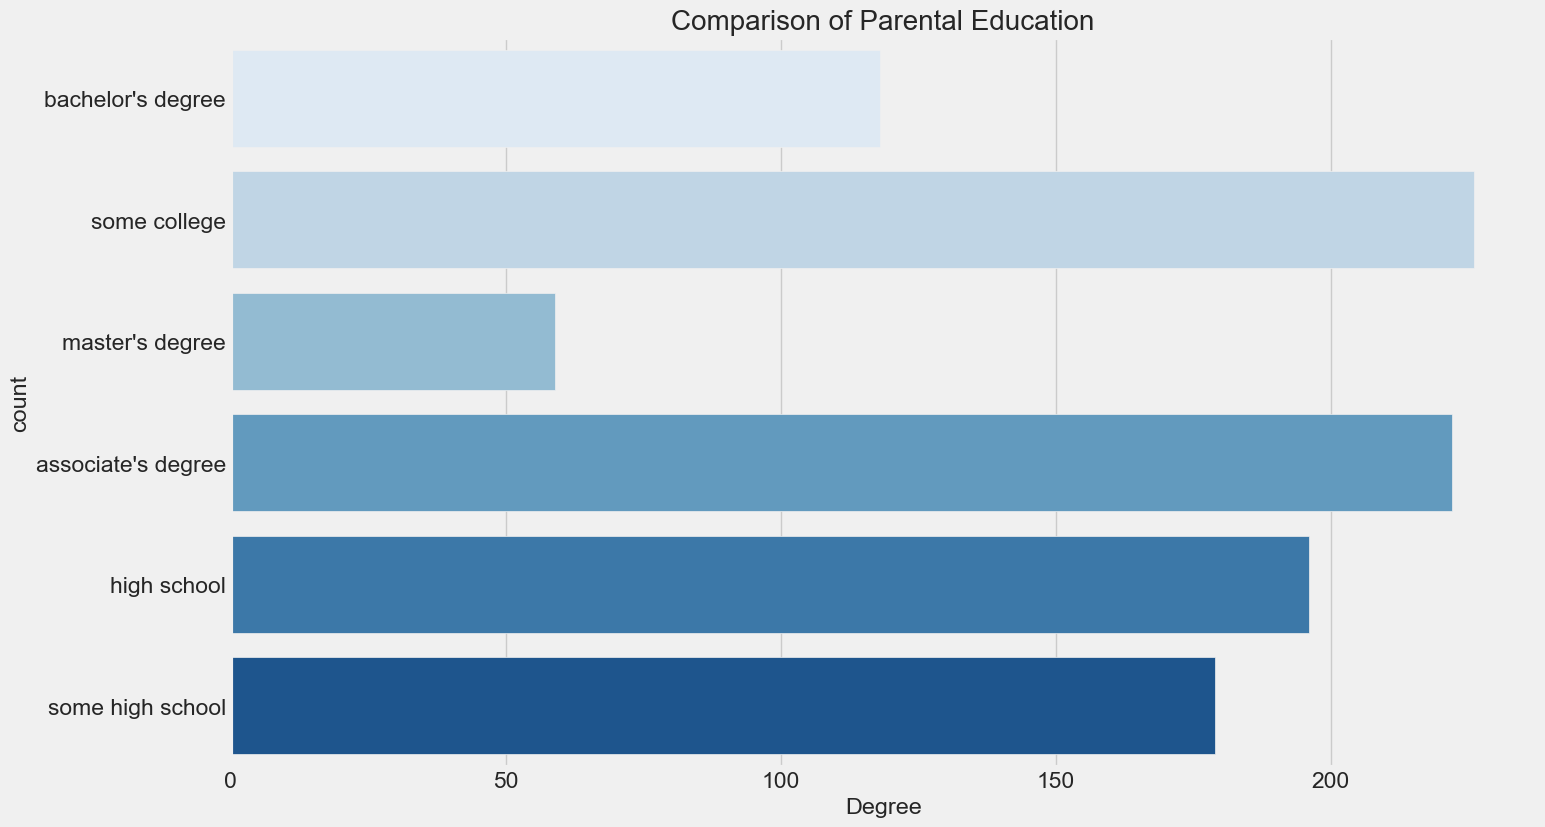

In [63]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

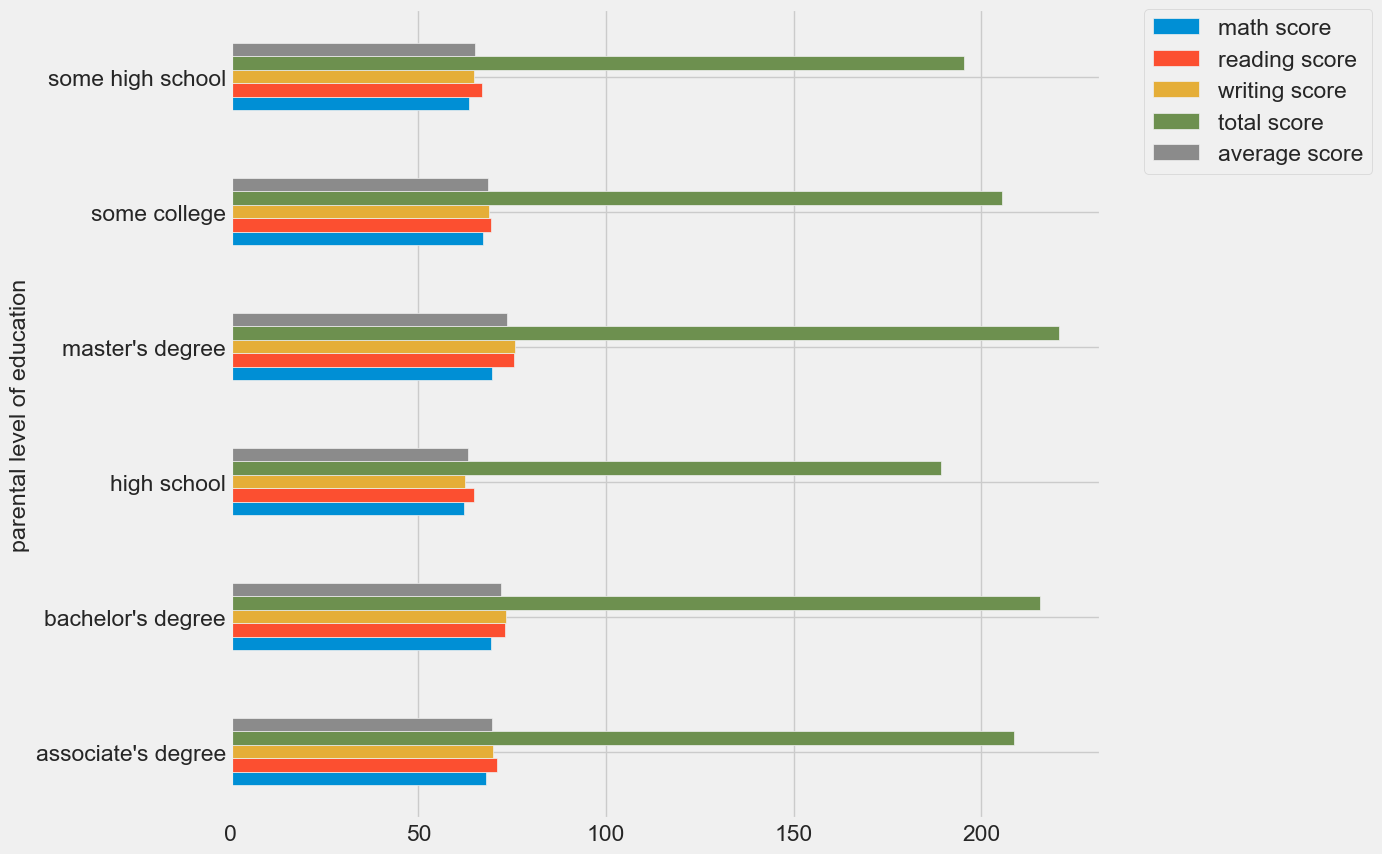

In [64]:
data.groupby('parental level of education').mean(numeric_only=True).plot(kind = 'barh', figsize = (10,10))
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)
plt.show()

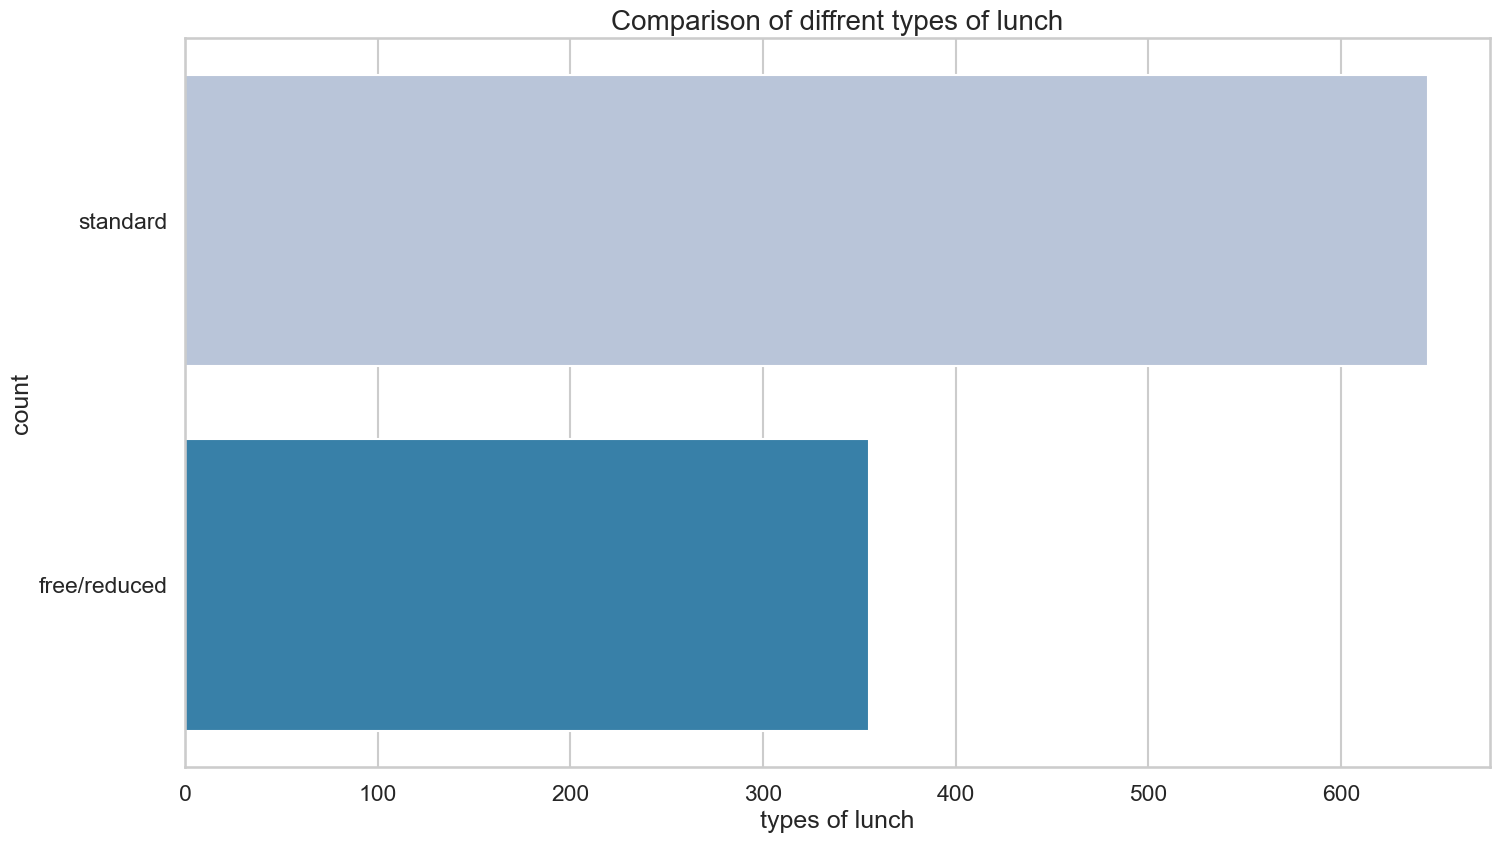

In [65]:
sns.set_theme(style="whitegrid")   # base theme
sns.set_context("talk")            # make fonts bigger (good for presentations)
plt.rcParams['figure.figsize'] = (15,9)
sns.countplot(data['lunch'], palette='PuBu')
plt.title('Comparison of diffrent types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

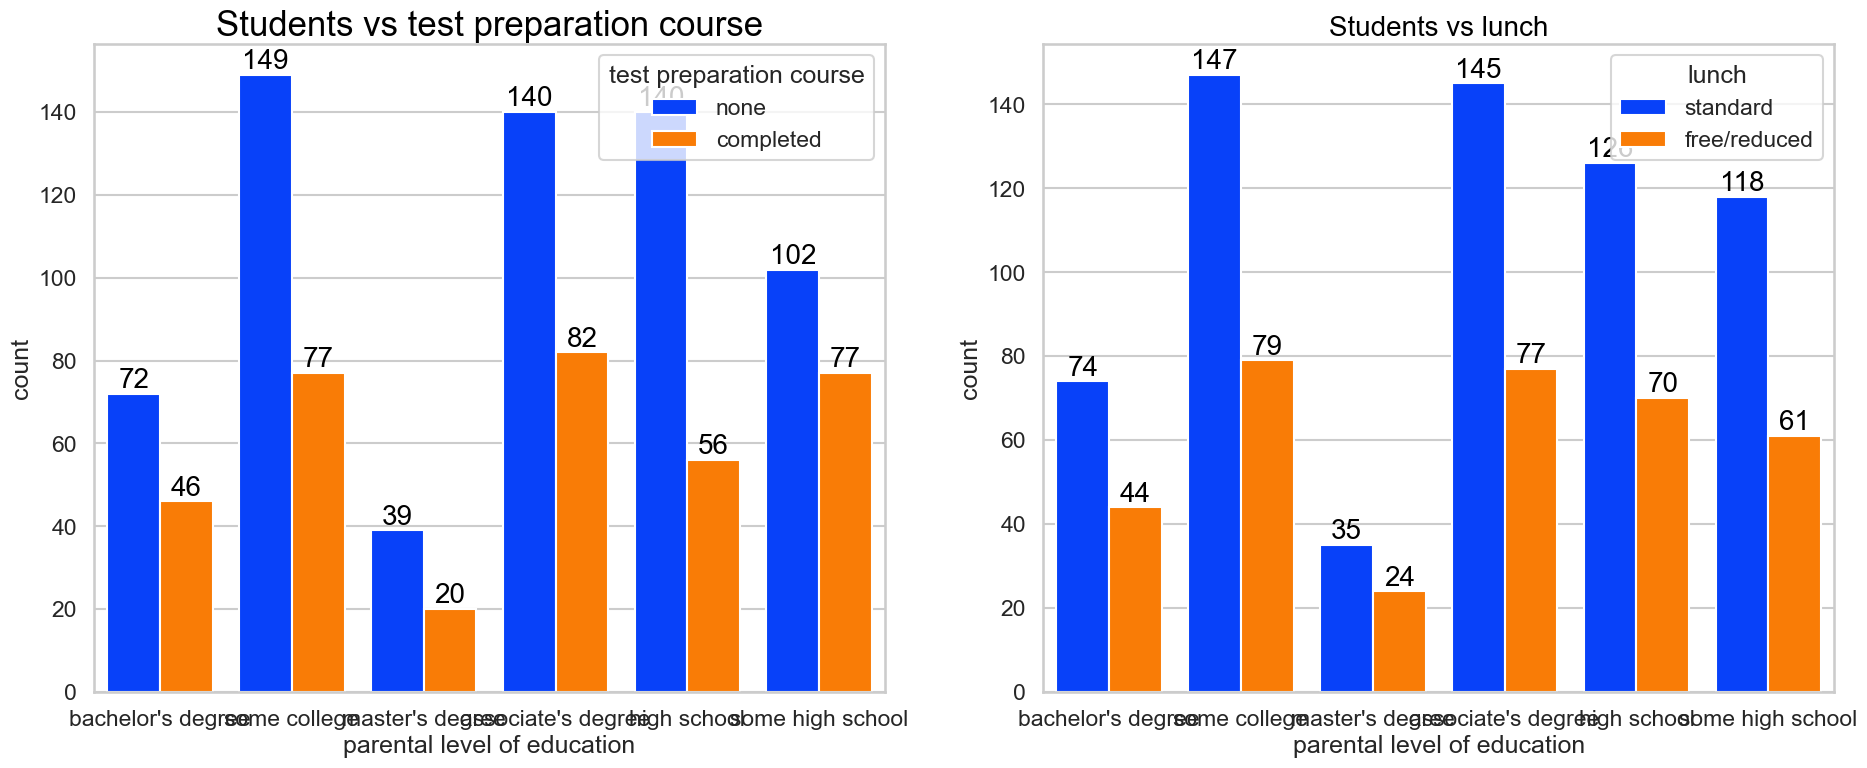

In [66]:
f,ax = plt.subplots(1,2, figsize = (20,8))
sns.countplot(x = data['parental level of education'], data = data, palette='bright', hue = 'test preparation course', saturation=0.95, ax = ax[0])
ax[0].set_title("Students vs test preparation course", color = 'black', size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

sns.countplot(x = data['parental level of education'], data = data, palette='bright', hue = 'lunch', saturation=0.95, ax = ax[1])
ax[1].set_title("Students vs lunch", color='black', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 20)


<Axes: xlabel='lunch', ylabel='writing score'>

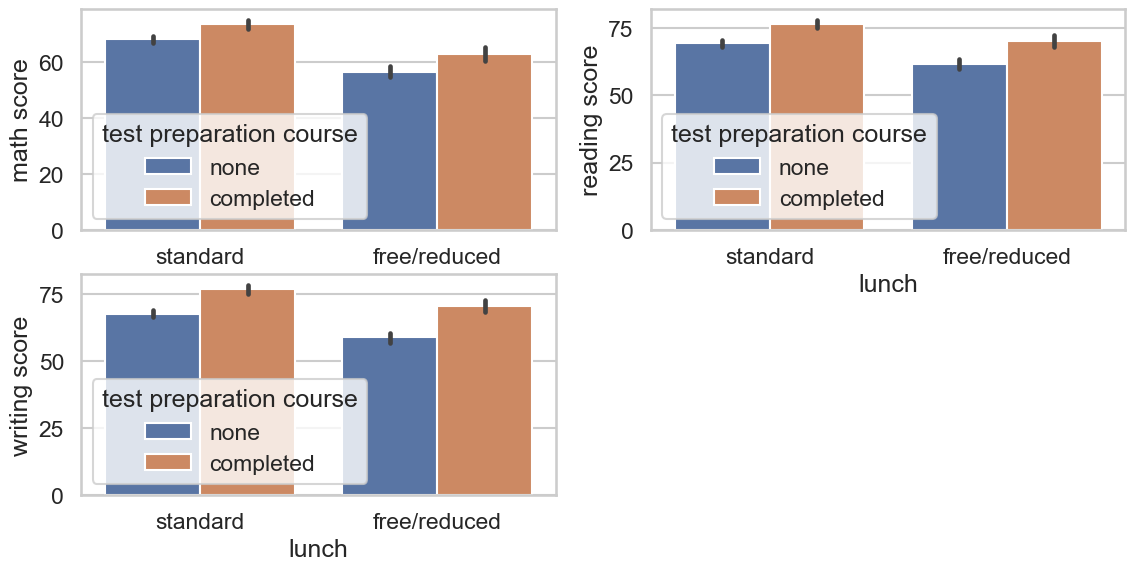

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x = data['lunch'], y = data['math score'], hue = data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x = data['lunch'], y = data['reading score'], hue = data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x = data['lunch'], y = data['writing score'], hue = data['test preparation course'])


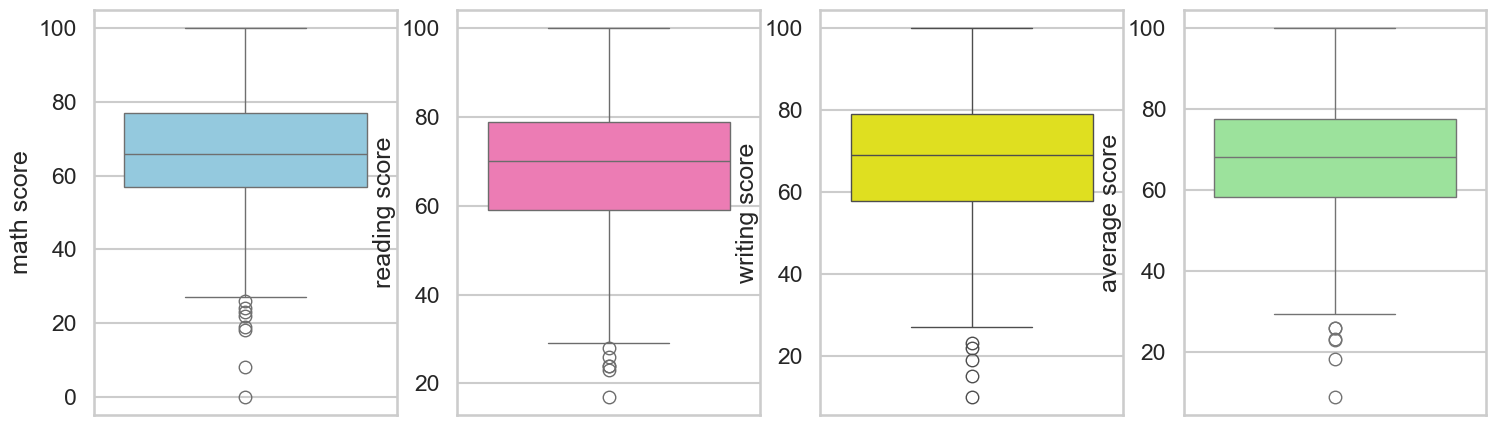

In [68]:
plt.subplots(1,4,figsize = (16,5))
plt.subplot(141)
sns.boxplot(data['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(data['average score'], color='lightgreen')
plt.show()


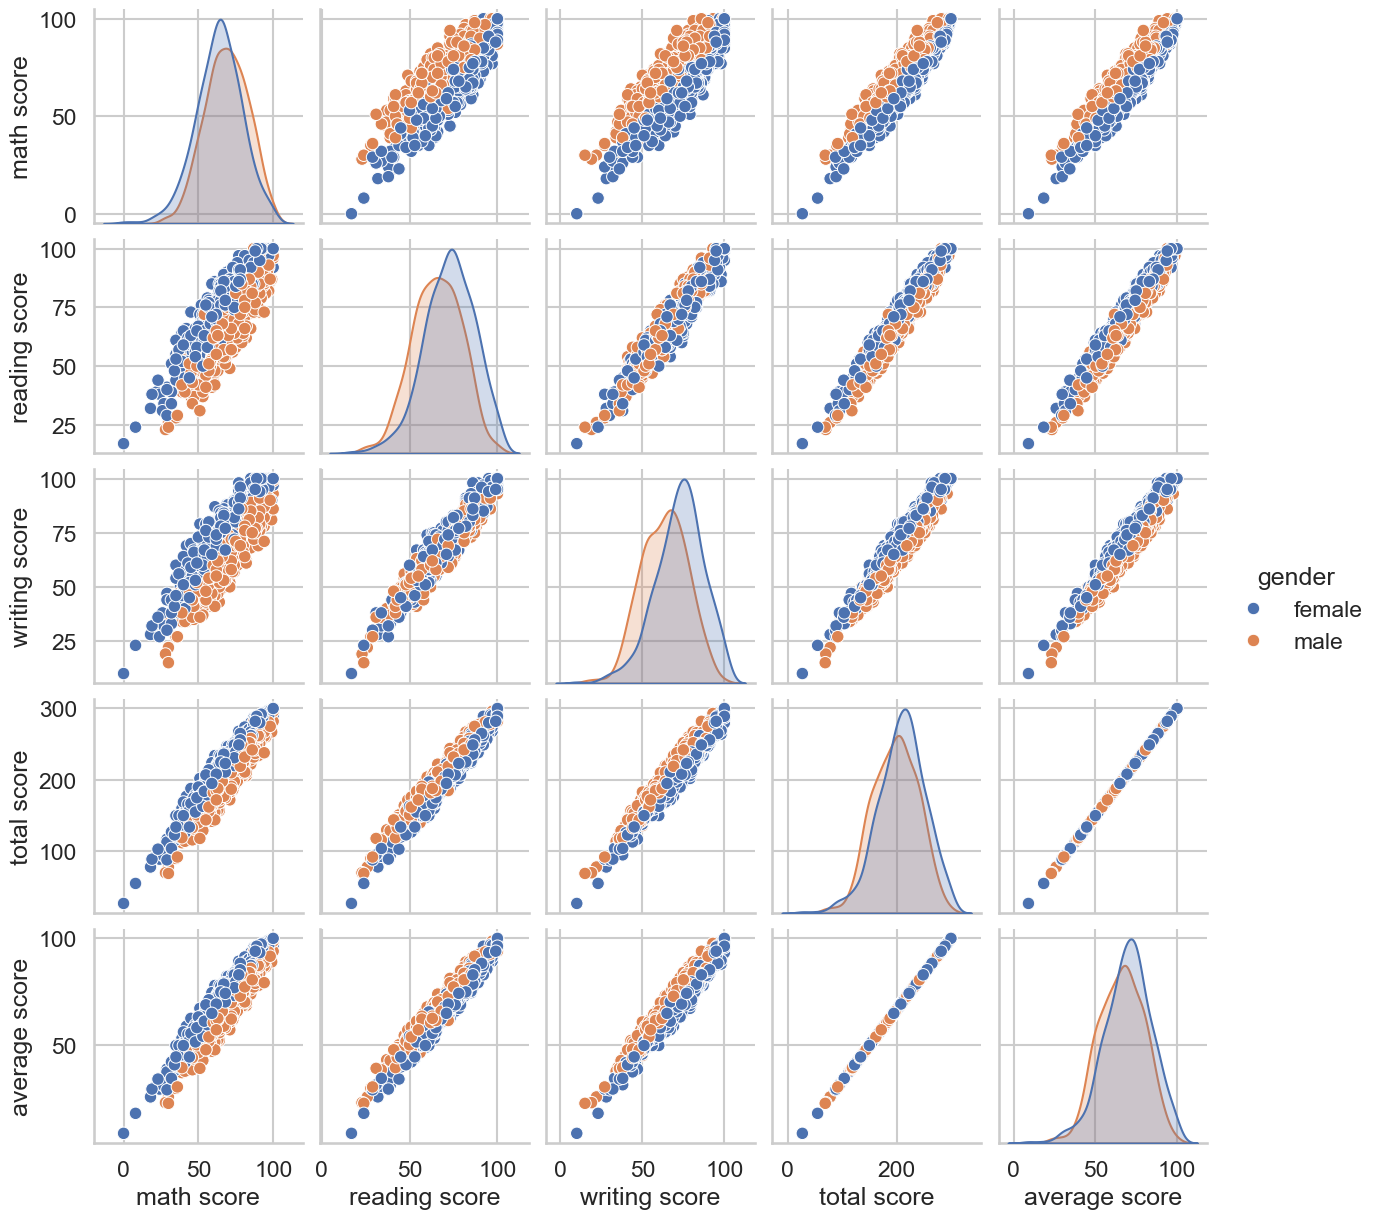

In [69]:
sns.pairplot(data, hue = 'gender')
plt.show()